In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats import norm
palette = ['#001A72', '#FC4C02', '#41B6E6', '#B7C01B', '#00D4C5', '#00A499', '#DBE442']
bg = '#EBF6F3'
np.random.seed(42)
plt.rcParams.update({'axes.facecolor':bg})
plt.rcParams['axes.prop_cycle'] = cycler(color=palette)
plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['axes.grid'] = True

# Statistical Inference

Probability theory and Statistical Inference are complementary tools that we use to study aleatory and noisy behaviours. (To be improved)

In Probability Theory, we use the rules of probability to build a model of a object we want to study, and then we use this model to deduce what is going to happen when we run an experiment on it. This is a deductive process. 

In statistical inference, on the other hand, we observe the results of an experiment ran on the object we are studying and, after making some assumptions on its behaviour, we want to use them to learn something about it.

As an example, consider a coin as a the object of study. We assume that the probability of landing head when tossed is 70% (the coin is rigged). Then, using probability theory, we can deduce other things: for example that the probability of landing tails is 30%, that the probability of landing two heads in a row in 14%, and so on. This is a typical example of the deductive process conducted using probability theory.

On the other hand, suppose you are given a coin that you don't know and you want to know whether it's rigged. You might assume a few things about it: for example that the probability of getting head if you toss it doesn't change over time; that the result of each toss does not influence the others, and so on. Then you conduct an experiment, and toss it 100 times, getting 35 heads. What do you conclude? Is the coin rigged? This is the kind of question that statistical inference can help you answer.


## Theoretical Foundations

### Experiments, Models and Random Variables

Usually we model the data coming from an experiment as a sequence of independent and identically distributed (from now on, i.i.d.) Random Variables, $X_1, X_2,  ..., X_n$. We will make some assumptions about the properties of these Random Variables, and usually try to learn something about them, usually by calculating a *statistic* $t = T(X_1, X_2,  ..., X_n)$, a function of the data that summarises some quantity of information useful for us. Note that the statistic is itself a random variable, being a function of random variables.

An example of a statistic is the sample mean:

$$
    \bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}
$$

It turns out this specific statistic has a very nice asymptotic property:

### The Strong Law of Large Numbers

Let $(X_i)_{i \in \mathbb{N}}$ be a sequence of i.i.d. Random Variables. Suppose that $\mathbb{E}[X_1] = \mu$ and $\mathbb{V}[X_1] = \sigma < \infty$. Then, with probability 1, $\bar{X} \rightarrow \mu$ as $n \rightarrow \infty$.

What this tells us is that if we take a sample that is big enough, we can use our statistic - the sample mean - to approximate (**estimate**) a parameter of our model - the expected value. Notice how we are making very little assumptions about the Random Variables that we are studying: they only need to have a finite Expected Value and Variance.

By carefully modelling our data, even by just using the sample mean, we can answer a variety of questions, including the one we considered in the introduction: it is sufficient to consider a random variable that takes the value 1 if the result of the coin is head, and 0 if it is tail. Then we set:

$$
    \mathbb{P}[X = 1] = p
$$

$$
    \mathbb{P}[X = 0] = 1 - p
$$

and we have:

$$
    \mathbb{E}[X] = p
$$

$$
\sigma^2 = \mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2 = p(1 - p) = .25
$$

and we are able to estimate the probability of the coin of landing on head using the sample mean. The Law of the Large numbers ensures us that with a big enough sample, we'll get to the right answer. Thanks to Python, we don't have to trust this. We can actually try it out. Using NumPy Random library, we can simulate a sample of 300 coin tosses from a fair coin:

In [2]:
n = 300
possible_results = [0, 1]
mu = np.mean(possible_results)
sigma = np.sqrt(np.square(possible_results - mu).mean())
# Sampling
X_i = np.random.choice(possible_results, size = n)

We can then look at how the sample mean of the sample changes while n grows:

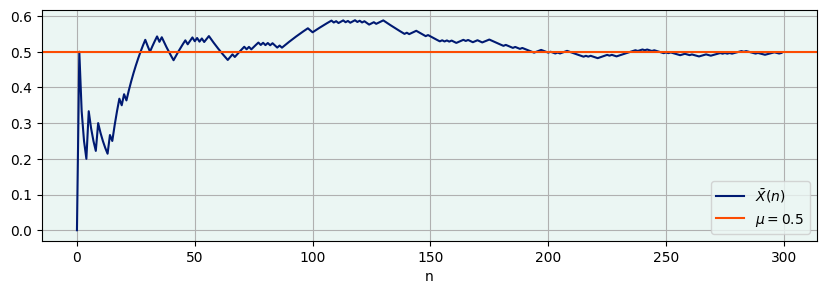

In [3]:
plt.plot(X_i.cumsum()/np.arange(1, n + 1), label = r'$\bar{X}(n)$')
plt.axhline(np.mean(possible_results), color = palette[1], label = r'$\mu = $' + f'{mu}');
plt.legend();
plt.xlabel("n");

In the plot, we see exactly the kind of behaviour described by the SLLN: as n grows, the sample mean taken from the i.i.d. Random Variables converges to the expected value $\mu = 0.5$ (remember, we simulated a fair coin, that hence lands on head roughly half of the time). This is extremely important, as notice what we are saying: if we are given a sample that is big enough, we are guaranteed to learn something about the Random Variables we are studying, i.e., their expected value. As we are using Random Variables to model the world, this means we can learn something about the world through this procedure. This theorem lies at the centre of Statistical Inference.

### INSERT SAMPLING - MODEL - WORLD DIAGRAM HERE

When a statistic is used this way (we use it to estimate a parameter of our model), we call it an **Estimator**. By itself, the estimator only gives us a **Point Estimate** of the quantity we are trying to study, that is, our best guess about it. If the estimator is well built, it'll have some nice properties that ensure that our guess will really be the best guess given the information we have. However, it does not say anything about how certain or uncertain we are about the guess. 

In fact, correctly quantifying and communicating uncertainty is one of the main concerns of statistical inference. We want to be able to discern cases where we tossed a coin 10 times and got 4 heads from cases where we tossed it 10000 times and got 4000 heads. While the point estimates of p for these two cases would be the same, we intuitively understand that they would lead to drastically different conclusions about wheter the coin is fair or not. Hence, we need a way of encoding this uncertainty and manipulating it in our calculations.

In order to do that, the LLN is not enough: it only tells us that we'll learn something as n becomes very, very large. It does not tell us how large it needs to be to get to a certain precision in our estimates - or, in other words, how certain we are about our point estimates given a sample size n. For that, we need another theorem.

### The Central Limit Theorem

Using the setting from the theorem above, we also have:

$$
    X_1 + X_2 + ... + X_n \sim \mathcal{N}(n\mu, n\sigma^2)
$$

as $n \rightarrow \infty$. Technically, what we have in this theorem in a convergence in distribution. Without going into too much technical details, what this means is that with a large enough n, we can make approximate probability statements about the sum of the Random Variables.

Before looking at how this theorem is useful for statistical inference, we can notice that even just this first results gives us a lot of insight on one possible way normal distributions can arise. Whenever we have an outcome that is the result of a lot of individual random contributions being summed up, we tend to get a Normal distribution as a result. Let's check this result with Python. What we can do is:
* simulate a bunch (N = 1000) of samples of length n = 300, from the same random variables
* for each sample, calculate the sum
* analyse the histogram of the sums, and compare it to the Normal Distribution given by the theorem

In [4]:
N = 1000
xs = np.random.choice(possible_results, size = (N, n))

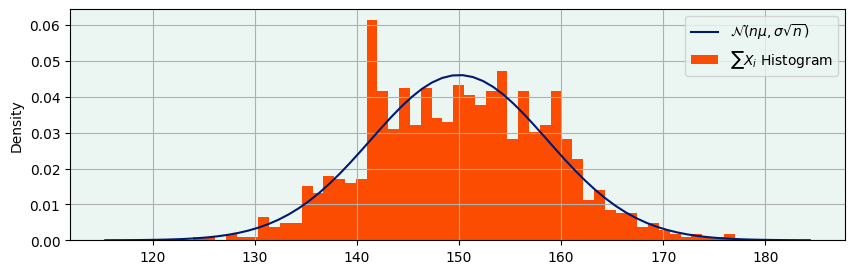

In [5]:
xs_sum = xs.cumsum(axis = 1)
sum_mean = n*mu
sum_sigma = np.sqrt(n)*sigma
rng = np.arange(sum_mean - 4*sum_sigma, sum_mean + 4*sum_sigma)
plt.plot(rng, norm.pdf(rng,sum_mean,sum_sigma), label = r'$\mathcal{N}(n\mu, \sigma\sqrt{n})$')
plt.hist(xs_sum[:, -1], bins = 50, density = True, label = r'$\sum{X_i}$' + " Histogram");
plt.legend()
plt.ylabel("Density");

In the plot, we have the histogram of our sample in orange, and the asymptotic distribution given by the CLT - $\mathcal{N}(n\mu, \sigma\sqrt{n})$ - in blue. We see that the histogram matches the distribution that we get from the theorem.

If we go back to our definition of the sample mean, we see that it involves a sum. Can we then use the CLT to infer something about the behaviour of the sample mean as n gets large? We can. By using some basic properties of Random Variables, we get:

$$
    \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt n}} \sim \mathcal{N}(0, 1)
$$

In fact, this one, and not the previous one, is the precise statement of the CLT. We can then use this to understand how we can tune our sampling to get an approximation that matches our needs. We'll check this, computationally, by considering many samples (N = 1000) and looking at how their sample mean changes as n grows:

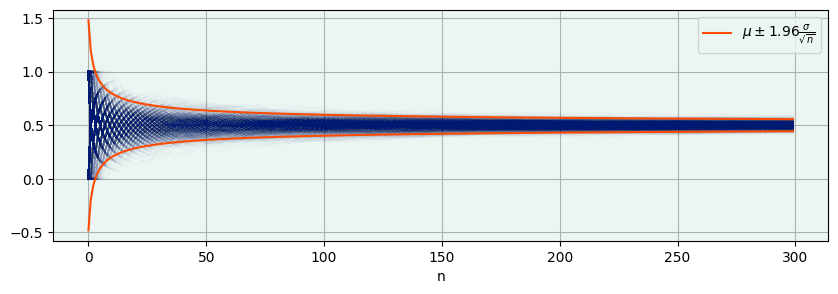

In [6]:
xs_means = xs_sum/(np.arange(1, n + 1).reshape(1, n))
_, ax = plt.subplots()
for i in range(N):
    plt.plot(xs_means[i, :], color = palette[0], alpha = 0.01)
plt.plot(mu + 1.96*sigma/np.sqrt(np.arange(1, n + 1)), color = palette[1], label = r'$\mu \pm 1.96\frac{\sigma}{\sqrt{n}}$');
plt.plot(mu - 1.96*sigma/np.sqrt(np.arange(1, n + 1)), color = palette[1]);
plt.legend();
plt.xlabel("n");

Finally, we can see the distribution of the sample means for n = 300:

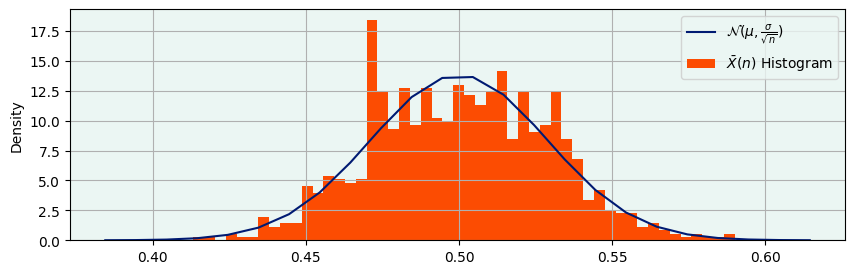

In [7]:
mean_mean = mu
mean_sigma = sigma/np.sqrt(n)
rng = np.arange(mean_mean - 4*mean_sigma, mean_mean + 4*mean_sigma, 0.01)

plt.plot(rng, norm.pdf(rng,mean_mean,mean_sigma), label = r'$\mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}})$')
plt.hist(xs_means[:, -1], bins = 50, density = True, label = r'$\bar{X}(n)$' + " Histogram");
plt.legend();
plt.ylabel("Density");

Again, in the plot we see the matching between the asymptotic distribution given by the CLT and the histogram of our sample. Think about what distribution is: it is the distribution of the Statistic we are studying, the sample mean. As we said before, being a function of random variables, it is a random variable itself. We'll call the distribution of a statistic the **Sampling Distribution**, and its standard deviation the **Standard Error**. 

Let's reflect on what we achieved:

* We discovered that if we have a large enough sample of i.i.d. random variables, the sample mean will be close enough to the expectation of the random variables.
* We also discovered what "close enough" means: the sampling distribution of the sample means is a Normal, centered around the mean mu, and with standard error inversely proportional to the square root of n and directly proportional to the standard deviation of the random variables we are studying.

The question, now, is how do we use these results for Statistical Inference. The typical situation we found ourselves in is to have a single sample (in our setting, N = 1), and from that we want to learn something about the data generating process. Thanks to the result above, after making some assumptions about the random variables we are studying, we can calculate the theoretical distribution of our statistic. How can we use this to quantify our uncertainty about the point estimates we calculate? In classical statistics we have two main ways:

* Confidence Intervals
* Hypothesis Testing

## Confidence Intervals

## Hypothesis Testing